Ethiopian sign language to Amharic Text Translation using LSTM (long short term memory) neural network.

### 1. import and install dependencies

In [121]:
# pip --version

In [8]:
# !pip list

In [9]:
# pip show tensorflow

In [13]:
# pip show mediapipe

In [10]:
import tensorflow as tf

In [11]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


### 2. keypoints using MP Holistic

In [14]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [15]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [16]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [17]:
from PIL import ImageFont, ImageDraw, Image

In [18]:
cap = cv2.VideoCapture(0)

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)


#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        #make detaction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image,results)
             
      # Draw Amharic text on the frame
    
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        draw.text((10, 20), 'ሰላም እንዲት ናችሁ?',font=font, fill=font_color)
        image = np.array(img_pil)

        
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
       
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [19]:
cap.release()
cv2.destroyAllWindows()

In [20]:
len(results.left_hand_landmarks.landmark)

21

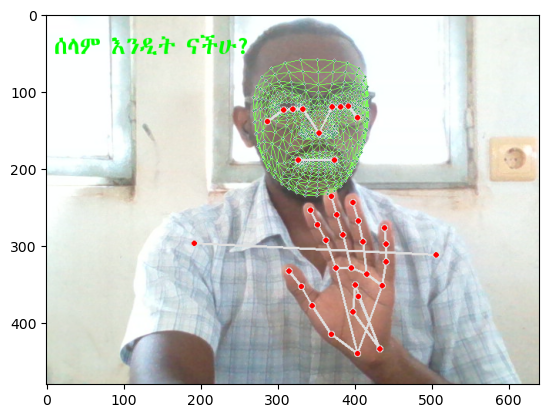

In [21]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

### 3. Extract key point values

In [22]:
len(results.pose_landmarks.landmark)

33

In [23]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [24]:
len(pose)

33

In [25]:
pose[0]

array([ 0.55457366,  0.32213652, -1.12513041,  0.9999392 ])

In [26]:
len(results.face_landmarks.landmark)*3

1404

In [27]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x,res.y,res.z])
    face.append(test)

In [28]:
len(face)

468

In [29]:
results.pose_landmarks.landmark

[x: 0.55457366
y: 0.32213652
z: -1.1251304
visibility: 0.9999392
, x: 0.58092016
y: 0.251738
z: -1.0314487
visibility: 0.9999337
, x: 0.59706515
y: 0.25032943
z: -1.0319117
visibility: 0.99994373
, x: 0.61262643
y: 0.248962
z: -1.0316148
visibility: 0.99994093
, x: 0.5215732
y: 0.25632194
z: -1.045715
visibility: 0.999906
, x: 0.50096583
y: 0.25787506
z: -1.0454772
visibility: 0.99989533
, x: 0.4816324
y: 0.2590585
z: -1.0458953
visibility: 0.99987215
, x: 0.6322504
y: 0.28082117
z: -0.46723858
visibility: 0.99995595
, x: 0.448561
y: 0.29017413
z: -0.527757
visibility: 0.99992824
, x: 0.585585
y: 0.39515617
z: -0.91175175
visibility: 0.9999641
, x: 0.51241535
y: 0.39567286
z: -0.93131816
visibility: 0.9999554
, x: 0.7913995
y: 0.6500925
z: -0.1304715
visibility: 0.99935967
, x: 0.30078182
y: 0.6193288
z: -0.22515476
visibility: 0.99493635
, x: 0.88371134
y: 1.2564914
z: -0.70759845
visibility: 0.9291337
, x: 0.251077
y: 1.0330541
z: -0.5915783
visibility: 0.35932446
, x: 0.67658097
y: 

In [30]:
results.face_landmarks.landmark

[x: 0.55524707
y: 0.37301764
z: -0.036314413
, x: 0.55788594
y: 0.3184105
z: -0.057491243
, x: 0.5549939
y: 0.33652136
z: -0.03203829
, x: 0.546055
y: 0.27491263
z: -0.041615874
, x: 0.55819494
y: 0.30362964
z: -0.0603698
, x: 0.55727774
y: 0.28603953
z: -0.0550596
, x: 0.5538026
y: 0.24526444
z: -0.023303736
, x: 0.4684077
y: 0.25103804
z: 0.010241393
, x: 0.55266875
y: 0.21060973
z: -0.014647319
, x: 0.55275524
y: 0.19066253
z: -0.015751291
, x: 0.55138355
y: 0.1231661
z: 0.00037334583
, x: 0.5550966
y: 0.38113508
z: -0.035179947
, x: 0.55454403
y: 0.3884843
z: -0.031641867
, x: 0.55381644
y: 0.39246905
z: -0.026831865
, x: 0.55319375
y: 0.40113968
z: -0.024145737
, x: 0.55340064
y: 0.408691
z: -0.0259249
, x: 0.55333245
y: 0.41812125
z: -0.027776435
, x: 0.55289274
y: 0.42775983
z: -0.025626687
, x: 0.5515882
y: 0.43914577
z: -0.014623282
, x: 0.5569683
y: 0.3265189
z: -0.05247186
, x: 0.5456205
y: 0.32764393
z: -0.03901537
, x: 0.42699754
y: 0.1974892
z: 0.060743697
, x: 0.5011439


In [35]:
pose = np.array([[res.x, res.y, res.z, res.visibility]
                for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(21*3)

In [36]:
face = np.array([[res.x, res.y, res.z]
                for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [37]:
lh = np.array([[res.x, res.y, res.z]
                for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
                

In [38]:
lh

array([ 6.32031977e-01,  9.16834652e-01,  9.06205813e-08,  5.78559101e-01,
        8.66502404e-01, -9.31940414e-03,  5.40545702e-01,  7.89515257e-01,
       -1.62262898e-02,  5.17654538e-01,  7.36524761e-01, -2.49092691e-02,
        4.92558241e-01,  6.95763826e-01, -3.40786688e-02,  5.88348746e-01,
        6.87487185e-01, -4.25553136e-03,  5.68098962e-01,  6.12086117e-01,
       -2.17833407e-02,  5.51381052e-01,  5.70327818e-01, -3.82520370e-02,
        5.36445975e-01,  5.30166686e-01, -5.11864349e-02,  6.19088888e-01,
        6.85559154e-01, -1.52726853e-02,  6.02289796e-01,  5.97268224e-01,
       -3.14745493e-02,  5.89763582e-01,  5.43190479e-01, -4.75424826e-02,
        5.78341544e-01,  4.92096394e-01, -5.97246327e-02,  6.50285125e-01,
        7.02155828e-01, -2.92313825e-02,  6.42786622e-01,  6.15781546e-01,
       -4.65554893e-02,  6.33641541e-01,  5.60397089e-01, -5.92252277e-02,
        6.22554839e-01,  5.08549452e-01, -6.86519742e-02,  6.82231665e-01,
        7.34737337e-01, -

In [39]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
rh = np.array([[res.x, res.y, res.z]
                for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [42]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [44]:
 extract_keypoints(results)[:-10]

array([ 0.55457366,  0.32213652, -1.12513041, ...,  0.        ,
        0.        ,  0.        ])

In [45]:
468*3+33*4+21*3+21*3

1662

### 4. Setup Folders for Collection

In [46]:
DATA_PATH = os.path.join('MP_Data') # path for exported numpy array
# Data_PATH = "C:/Users/Elias/Desktop/Project-Feb to/ESLT-1/MP_DATA"
actions = np.array(['ሰላም', 'አመሰግናለሁ', 'እወዳችሆለሁ']) #action try to detact
no_sequences = 30 # Thirty videos of worth data
sequence_length = 30 # videos are going to be 30 frame in lenght

In [49]:
actions[0]

'ሰላም'

In [51]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect Keypoints Values for Training and Testing

In [31]:
cap = cv2.VideoCapture(0)

#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
   
   # Loop through actions
    for action in actions:
        # Loop through sequences in videos
        for sequence in range(no_sequences):
            # Loop through video length data sequence lengthqqq
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
                
                #make detaction 
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # draw landmarks
                draw_styled_landmarks(image,results)
                
                #Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully  
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [52]:
cap.release()
cv2.destroyAllWindows()

### 6. Preprocess Data and Create Labels and Features

In [53]:
import tensorflow as tf

In [54]:
tf.__version__

'2.15.0'

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [56]:
label_map = {label:num for num, label in enumerate(actions)}

In [57]:
label_map

{'ሰላም': 0, 'አመሰግናለሁ': 1, 'እወዳችሆለሁ': 2}

In [59]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [60]:
np.array(labels).shape

(90,)

In [61]:
np.array(sequences).shape

(90, 30, 1662)

In [62]:
np.array(window).shape

(30, 1662)

In [63]:
x = np.array(sequences)

In [64]:
x.shape

(90, 30, 1662)

In [65]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [66]:
y = to_categorical(labels).astype(int)

In [67]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [69]:
x_test.shape

(5, 30, 1662)

In [70]:
x_train.shape

(85, 30, 1662)

In [71]:
y_test.shape

(5, 3)

In [72]:
y_train.shape

(85, 3)

### 7. Build and Train LSTM Neural Network

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [74]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [76]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [77]:
x.shape

(90, 30, 1662)

In [78]:
actions.shape[0]

3

In [79]:
res = [.1, 0.3, 0.5]

In [80]:
np.argmax(res)

2

In [81]:
actions[np.argmax(res)]

'እወዳችሆለሁ'

In [83]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
# # train a neural network model with input data x_train and corresponding labels y_train for 2000 epochs

# model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback]) 

Epoch 1/2000


3/3 [==============================] - 15s 102ms/step - loss: 6.9877 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 91ms/step - loss: 8.5452 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.3690 - categorical_accuracy: 0.2118
Epoch 4/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.8098 - categorical_accuracy: 0.2706
Epoch 5/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.4214 - categorical_accuracy: 0.2706
Epoch 6/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.2287 - categorical_accuracy: 0.2118
Epoch 7/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.6717 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.2274 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.3512 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 92ms/step - loss: 0.5462 - categorical_accuracy: 0.7059
Epoch 142/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0896 - categorical_accuracy: 0.6588
Epoch 143/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7830 - categorical_accuracy: 0.6588
Epoch 144/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.7477 - categorical_accuracy: 0.6353
Epoch 145/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.8202 - categorical_accuracy: 0.7529
Epoch 146/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.2068 - categorical_accuracy: 0.7059
Epoch 147/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.8308 - categorical_accuracy: 0.6706
Epoch 148/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.1208 - categorical_accuracy: 0.5765
Epoch 149/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.4806 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 96ms/step - loss: 0.0964 - categorical_accuracy: 0.9647
Epoch 286/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1045 - categorical_accuracy: 0.9529
Epoch 287/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0939 - categorical_accuracy: 0.9647
Epoch 288/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1059 - categorical_accuracy: 0.9647
Epoch 289/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0983 - categorical_accuracy: 0.9882
Epoch 290/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0993 - categorical_accuracy: 0.9647
Epoch 291/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0974 - categorical_accuracy: 0.9882
Epoch 292/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1151 - categorical_accuracy: 0.9529
Epoch 293/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.1176 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 95ms/step - loss: 0.1434 - categorical_accuracy: 0.9529
Epoch 430/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1976 - categorical_accuracy: 0.9059
Epoch 431/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4783 - categorical_accuracy: 0.8588
Epoch 432/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4665 - categorical_accuracy: 0.8471
Epoch 433/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.4995 - categorical_accuracy: 0.6353
Epoch 434/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4126 - categorical_accuracy: 0.8706
Epoch 435/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0608 - categorical_accuracy: 0.7176
Epoch 436/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.3199 - categorical_accuracy: 0.6706
Epoch 437/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.8251 - categorical_accuracy: 0.52

3/3 [==============================] - 0s 100ms/step - loss: 0.1243 - categorical_accuracy: 0.9647
Epoch 574/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.2143 - categorical_accuracy: 0.9529
Epoch 575/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2807 - categorical_accuracy: 0.8941
Epoch 576/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.5023 - categorical_accuracy: 0.9176
Epoch 577/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8759 - categorical_accuracy: 0.8941
Epoch 578/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0427 - categorical_accuracy: 0.8235
Epoch 579/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0797 - categorical_accuracy: 0.9059
Epoch 580/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4304 - categorical_accuracy: 0.9412
Epoch 581/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.9726 - categorical_accuracy: 0.8

3/3 [==============================] - 0s 86ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0021 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 80ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 862/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 863/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 864/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0014 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 92ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 99ms/step - loss: 9.8057e-04 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 97ms/step - loss: 9.7672e-04 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 94ms/step - loss: 9.9451e-04 - categor

3/3 [==============================] - 0s 100ms/step - loss: 7.5543e-04 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 74ms/step - loss: 8.1721e-04 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 90ms/step - loss: 7.5287e-04 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.7035e-04 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.0332e-04 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.8967e-04 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.8184e-04 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.6214e-04 - categorical_accuracy: 1.0000
Epoch 1151/2000
3/3 [==============================] - 0s 99ms/step - l

3/3 [==============================] - 0s 97ms/step - loss: 6.1448e-04 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 100ms/step - loss: 6.1313e-04 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 90ms/step - loss: 6.1138e-04 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.1030e-04 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 93ms/step - loss: 5.9946e-04 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.9951e-04 - categorical_accuracy: 1.0000
Epoch 1287/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.0483e-04 - categorical_accuracy: 1.0000
Epoch 1288/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.0833e-04 - categorical_accuracy: 1.0000
Epoch 1289/2000
3/3 [==============================] - 0s 65ms/step - l

3/3 [==============================] - 0s 95ms/step - loss: 4.8516e-04 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.8104e-04 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.8231e-04 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.8423e-04 - categorical_accuracy: 1.0000
Epoch 1423/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.8193e-04 - categorical_accuracy: 1.0000
Epoch 1424/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.8064e-04 - categorical_accuracy: 1.0000
Epoch 1425/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.7853e-04 - categorical_accuracy: 1.0000
Epoch 1426/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.8193e-04 - categorical_accuracy: 1.0000
Epoch 1427/2000
3/3 [==============================] - 0s 91ms/step - lo

3/3 [==============================] - 0s 95ms/step - loss: 3.8248e-04 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.8507e-04 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.8926e-04 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 101ms/step - loss: 3.8596e-04 - categorical_accuracy: 1.0000
Epoch 1561/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.8641e-04 - categorical_accuracy: 1.0000
Epoch 1562/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.8655e-04 - categorical_accuracy: 1.0000
Epoch 1563/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.8333e-04 - categorical_accuracy: 1.0000
Epoch 1564/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.8032e-04 - categorical_accuracy: 1.0000
Epoch 1565/2000
3/3 [==============================] - 0s 67ms/step - l

3/3 [==============================] - 0s 86ms/step - loss: 3.1210e-04 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.0870e-04 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.0862e-04 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.1381e-04 - categorical_accuracy: 1.0000
Epoch 1699/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.0835e-04 - categorical_accuracy: 1.0000
Epoch 1700/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.0532e-04 - categorical_accuracy: 1.0000
Epoch 1701/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.1065e-04 - categorical_accuracy: 1.0000
Epoch 1702/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.0741e-04 - categorical_accuracy: 1.0000
Epoch 1703/2000
3/3 [==============================] - 0s 99ms/step - l

3/3 [==============================] - 0s 96ms/step - loss: 2.4692e-04 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.4693e-04 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4727e-04 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.5246e-04 - categorical_accuracy: 1.0000
Epoch 1837/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.4832e-04 - categorical_accuracy: 1.0000
Epoch 1838/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.4516e-04 - categorical_accuracy: 1.0000
Epoch 1839/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.4677e-04 - categorical_accuracy: 1.0000
Epoch 1840/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.4831e-04 - categorical_accuracy: 1.0000
Epoch 1841/2000
3/3 [==============================] - 0s 94ms/step - 

3/3 [==============================] - 0s 75ms/step - loss: 1.9966e-04 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.9942e-04 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.9897e-04 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.9589e-04 - categorical_accuracy: 1.0000
Epoch 1975/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.9809e-04 - categorical_accuracy: 1.0000
Epoch 1976/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.9710e-04 - categorical_accuracy: 1.0000
Epoch 1977/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.9783e-04 - categorical_accuracy: 1.0000
Epoch 1978/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.9634e-04 - categorical_accuracy: 1.0000
Epoch 1979/2000
3/3 [==============================] - 0s 100ms/ste

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

### 8. Make Predictions

In [86]:
model.predict(x_test)

1/1 [==============================] - 1s 579ms/step


array([[0.2640518 , 0.33614406, 0.39980417],
       [0.24284862, 0.3475125 , 0.40963897],
       [0.28475636, 0.33679074, 0.3784529 ],
       [0.25717303, 0.3442438 , 0.39858314],
       [0.25763935, 0.33343953, 0.4089212 ]], dtype=float32)

In [87]:
res = model.predict(x_test)

1/1 [==============================] - 0s 34ms/step


In [88]:
res[0]

array([0.2640518 , 0.33614406, 0.39980417], dtype=float32)

In [89]:
actions[np.argmax(res[2])]

'እወዳችሆለሁ'

In [90]:
actions[np.argmax(y_test[4])]

'ሰላም'

### 9. Save Weights

In [64]:
# model.save('action.h5')

In [122]:
model.load_weights('action.h5')

### 10. Evaluation using Confusion Matrix and Accuracy

In [130]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [131]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 32ms/step


In [132]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [133]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [2, 1]],

       [[2, 2],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [134]:
accuracy_score(ytrue, yhat)

0.6

## 11. Testing in real time (usng .h5 model)

In [139]:
from PIL import ImageFont, ImageDraw, Image

In [140]:
colors = [(245,117,16), (117,200,160), (16,117,245)]

# Function to render text with Amharic characters on OpenCV image
def render_text_with_amharic(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # Display Amharic text using render_text_with_amharic function
        output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
    return output_frame

In [144]:
# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)

# Function to render text on OpenCV image
def render_text(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.3

# Set up mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Make detections
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmarks
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Prediction logic
    keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        predictions.append(np.argmax(res))

        # Sentence formation logic
        if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Visualize probabilities
        image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere
        
    
    # Render sentence on the frame
    image = cv2.rectangle(image, (0, 0), (640, 40), (240, 240, 240), -1)
    image = render_text(image, ' '.join(sentence), (5, 5))

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


In [145]:
res[np.argmax(res)] > threshold

True

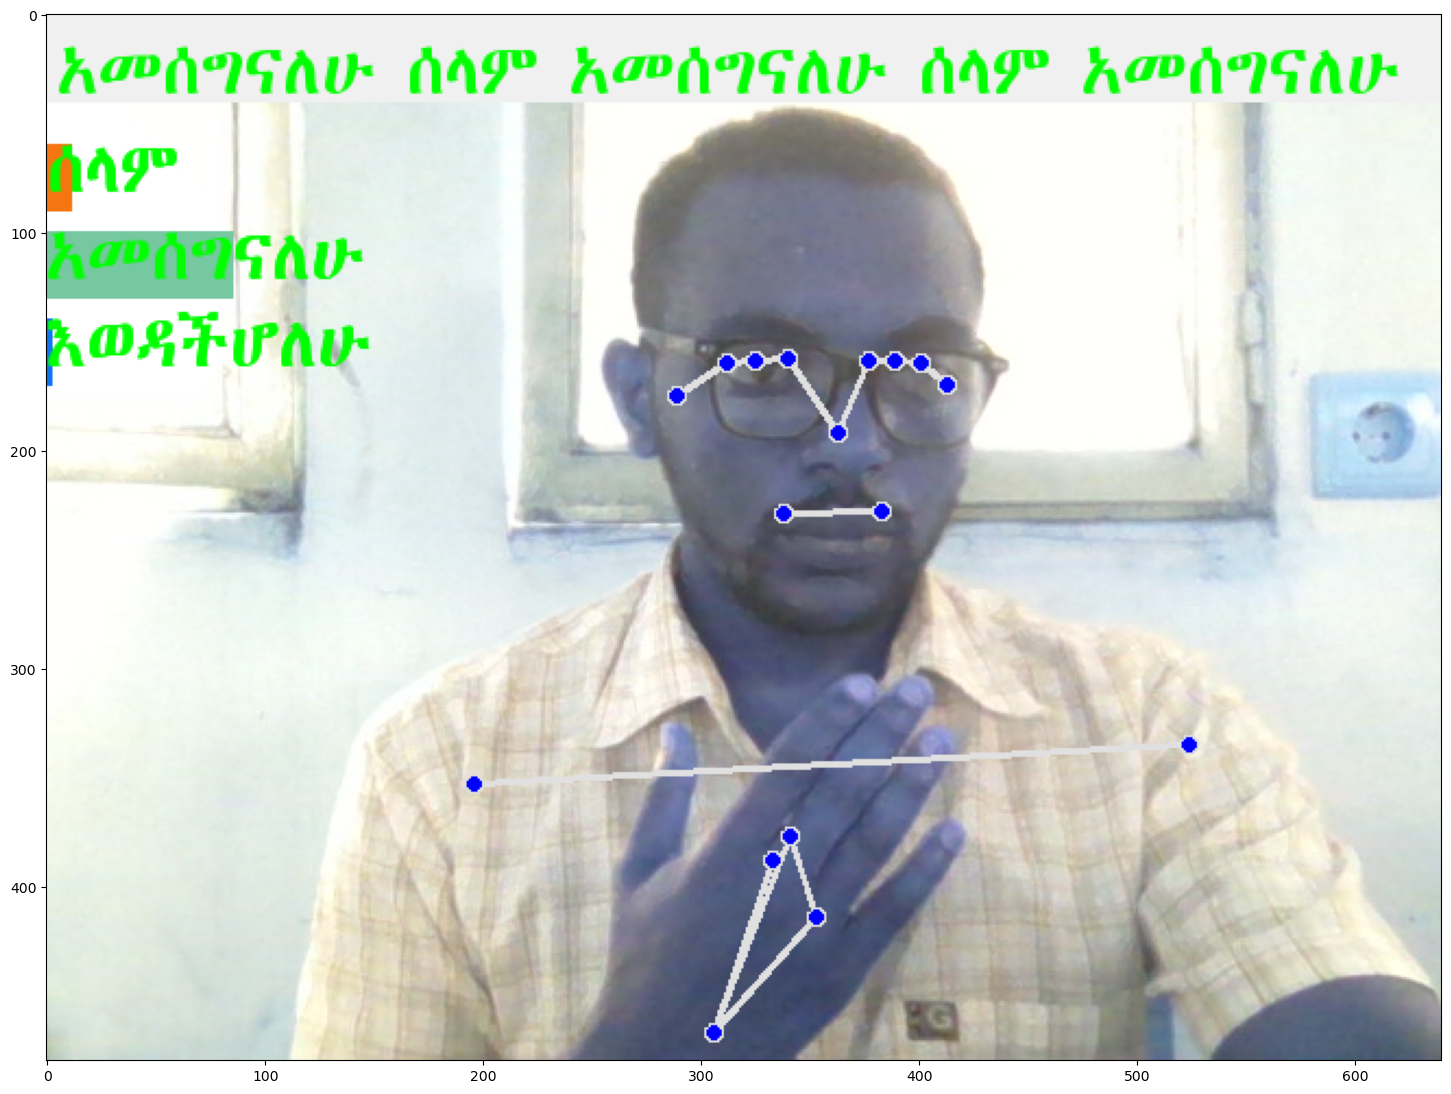

In [146]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [147]:
cap.release()
cv2.destroyAllWindows()

In [148]:
np.expand_dims(x_test[0], axis=0)

array([[[ 0.55313247,  0.58123988, -1.03259563, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55334145,  0.57986081, -1.0087136 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55338323,  0.57901996, -1.00942826, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.59965652,  0.57502103, -1.26179922, ...,  0.23404279,
          0.5150395 , -0.0121378 ],
        [ 0.59943891,  0.57613385, -1.27742076, ...,  0.23218682,
          0.51297772, -0.01285041],
        [ 0.59921449,  0.57662052, -1.27582788, ...,  0.23205204,
          0.51501346, -0.01659301]]])

In [149]:
model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 25ms/step


array([[4.6221888e-23, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

tflite model for deployment on mobile and embedded devices

## 12. Testing in Real Time (using .tflite model)

In [103]:
filesize = os.path.getsize('tmodel.tflite')

In [104]:
if filesize > 0:
    print("The model file contains data.")
else:
    print("The model file is empty or does not exist.")

The model file contains data.


In [105]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="tmodel.tflite")
interpreter.allocate_tensors()

In [106]:
# Get details about the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [109]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2

In [110]:
colors = [(245,117,16), (117,200,160), (16,117,245)]

# Function to render text with Amharic characters on OpenCV image
def render_text_with_amharic(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # Display Amharic text using render_text_with_amharic function
        output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
    return output_frame

In [115]:
# Set up mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)

# Function to render text on OpenCV image
def render_text(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Make detections
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmarks
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Prediction logic
    keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        # Perform inference with TensorFlow Lite model
        input_data = np.expand_dims(sequence, axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        res = interpreter.get_tensor(output_details[0]['index'])[0]

        predictions.append(np.argmax(res))

        # Sentence formation logic
        if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Visualize probabilities
        image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere

    # Render sentence on the frame
    image = cv2.rectangle(image, (0, 0), (640, 40), (240, 240, 240), -1)
    image = render_text(image, ' '.join(sentence), (5, 5))

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


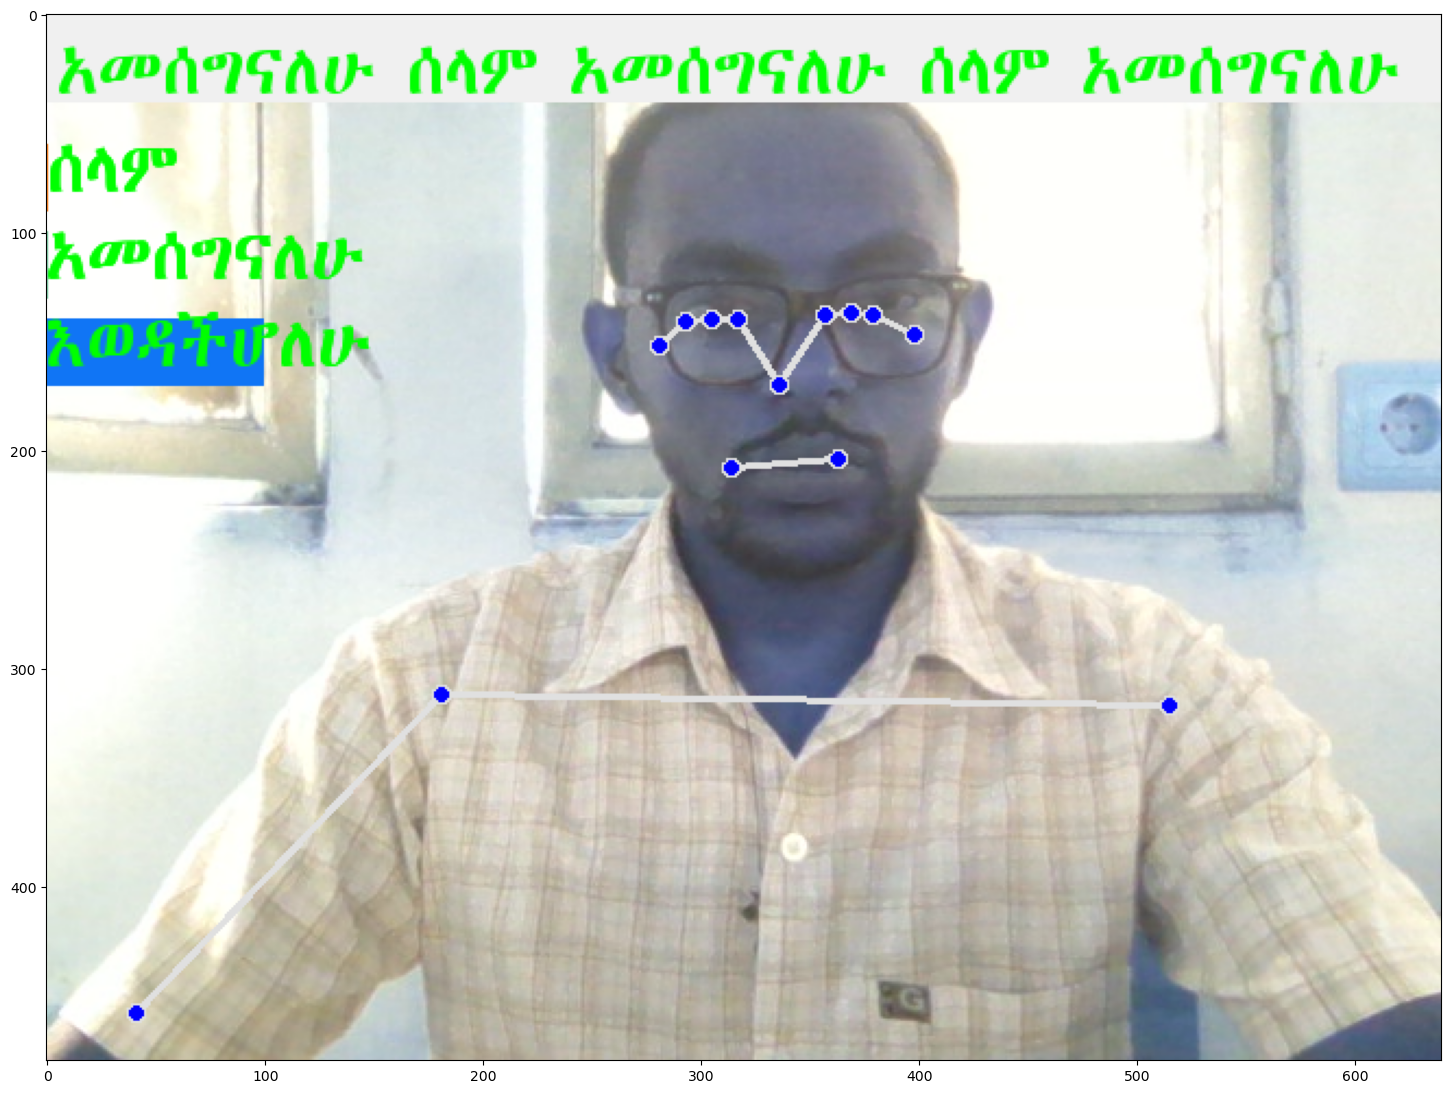

In [116]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [120]:
cap.release()
cv2.destroyAllWindows()


Ethiopian sign language to Amharic text Translation using LSTM (long short term memory) neural network.